Aim:For the given credit card dataset, perform k-means, heirarchical agglomerative with single linkage and complete linkage, and DBSCAN clustering. Perform EDA before applying the clustering algorithm.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print(df.shape)

(8950, 18)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
df.dropna(inplace=True)

In [8]:
print(df.shape)

(8636, 18)


In [9]:
df.drop("CUST_ID", axis=1, inplace=True)
print(df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [10]:
view = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY",
       "CASH_ADVANCE_FREQUENCY"]
print(df[view].max())
print(df[view].min())

BALANCE_FREQUENCY                   1.0
PURCHASES_FREQUENCY                 1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
CASH_ADVANCE_FREQUENCY              1.5
dtype: float64
BALANCE_FREQUENCY                   0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
dtype: float64


C:\Users\aradh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


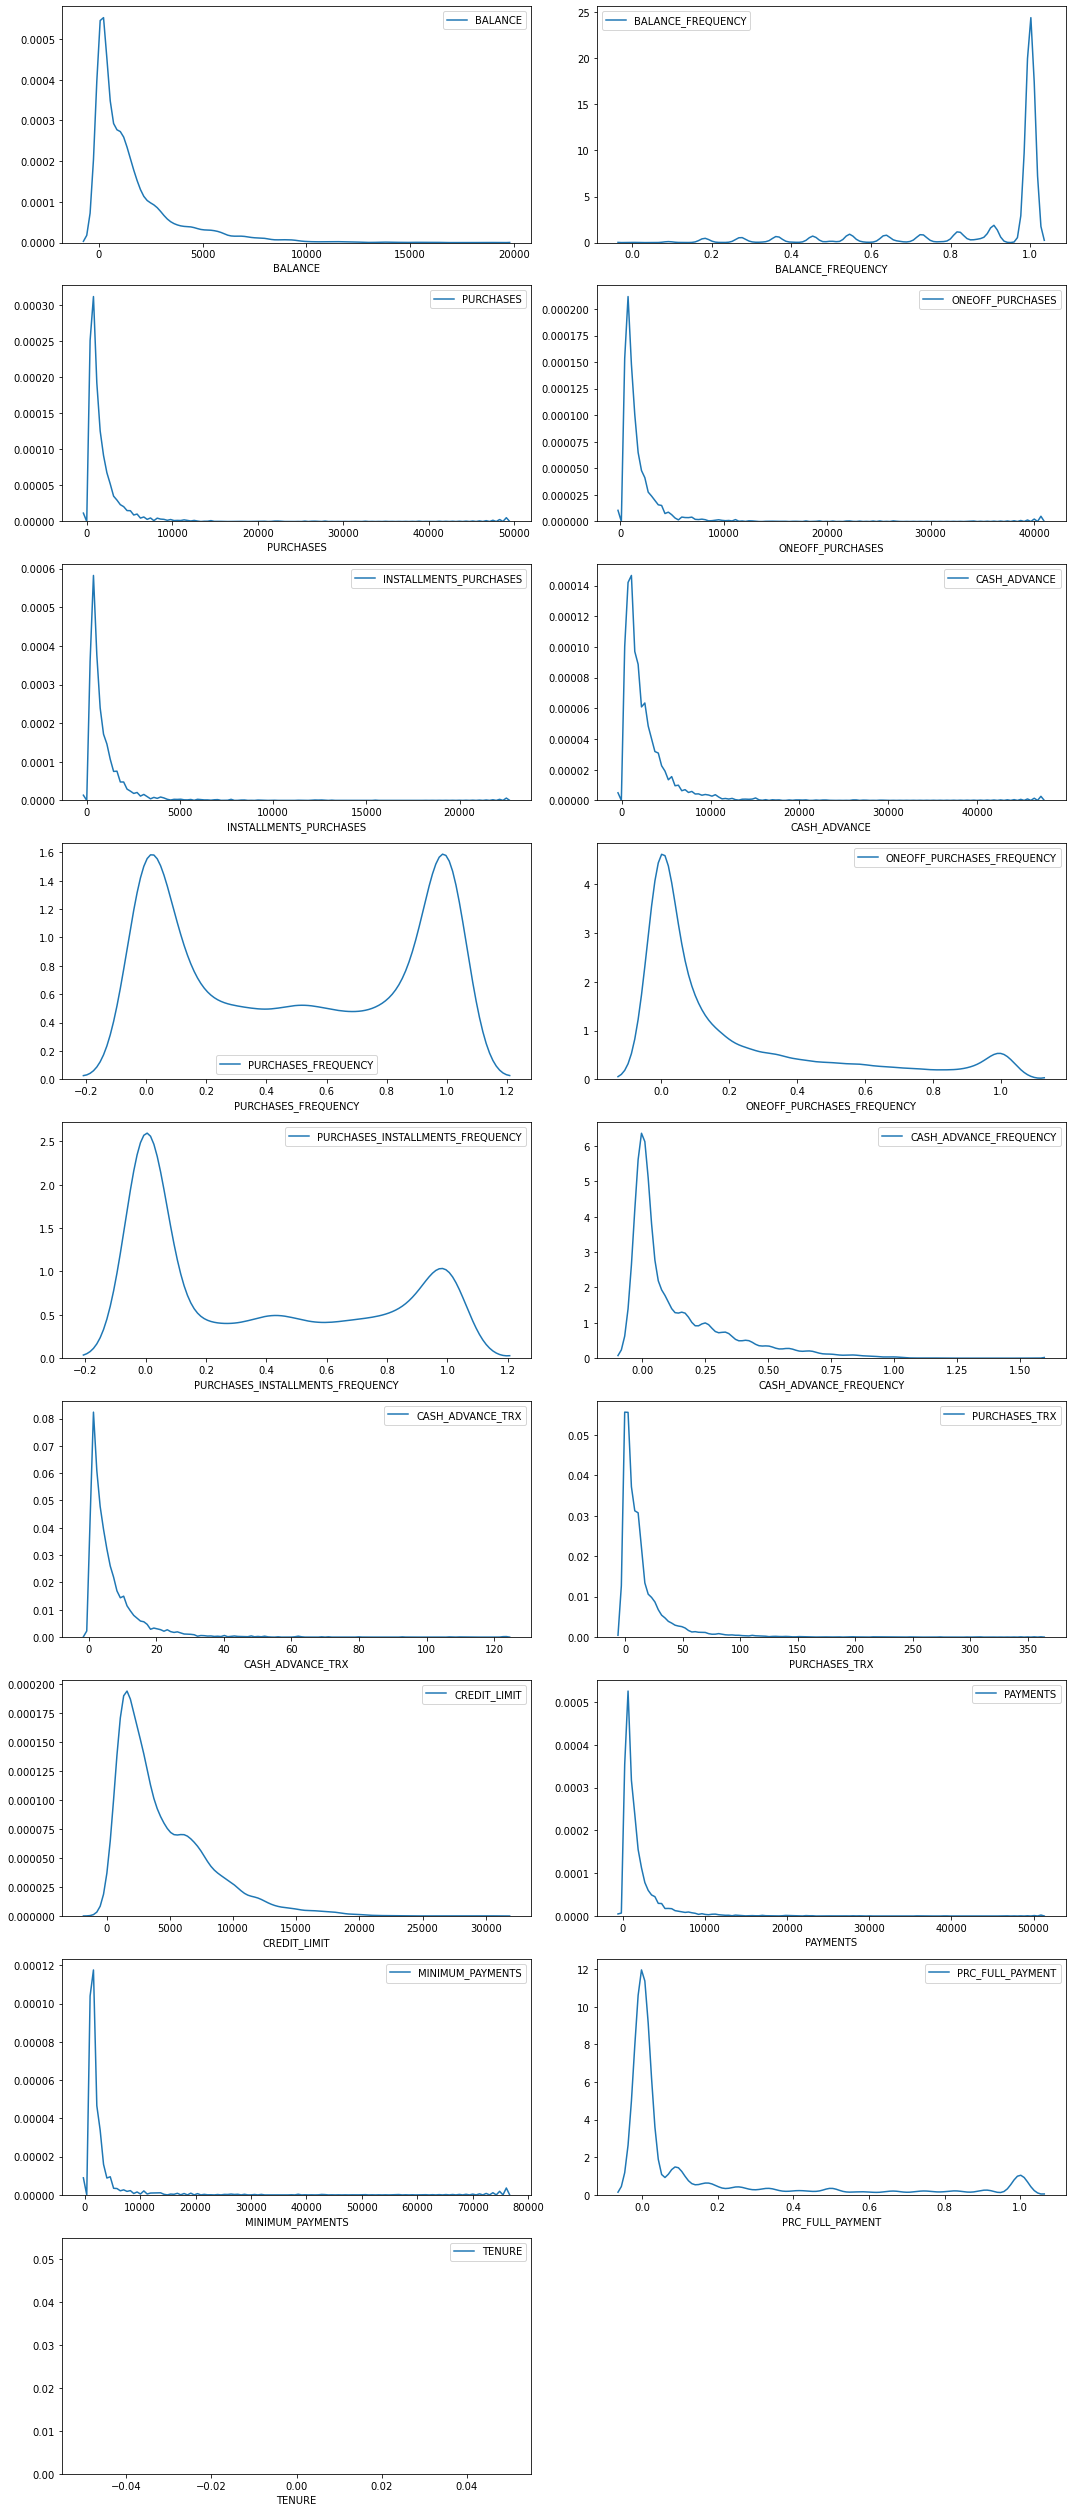

In [12]:
# Checking skweness
plt.figure(figsize=(15,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != "object":
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        plt.tight_layout()
        
plt.show()

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_normalized = normalize(x_scaled)
x_df = pd.DataFrame(x_normalized, columns=df.columns)

In [14]:
x_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311806,-0.154954,-0.179717,-0.150396,-0.148581,-0.196246,-0.343691,-0.287374,-0.300313,-0.285562,-0.200761,-0.216751,-0.403071,-0.227772,-0.127929,-0.225169,0.148729
1,0.215652,0.019100,-0.133545,-0.101359,-0.129489,0.724875,-0.348852,-0.193676,-0.261474,0.157198,0.028012,-0.168495,0.191114,0.224880,0.024747,0.059936,0.100236
2,0.121694,0.144174,-0.033208,0.028501,-0.130890,-0.133690,0.358313,0.754993,-0.264303,-0.194536,-0.136766,-0.034365,0.232162,-0.113964,-0.028500,-0.153394,0.101320
3,-0.156537,0.211587,-0.195017,-0.146385,-0.192092,-0.196202,-0.430561,-0.171033,-0.387886,-0.285498,-0.200715,-0.233329,-0.380097,-0.159155,-0.109322,-0.225118,0.148696
4,0.045686,0.231939,0.065195,-0.164825,0.456538,-0.215074,0.195195,-0.314946,0.247302,-0.312960,-0.220022,-0.128189,-0.341406,-0.060632,0.298463,-0.246772,0.162999


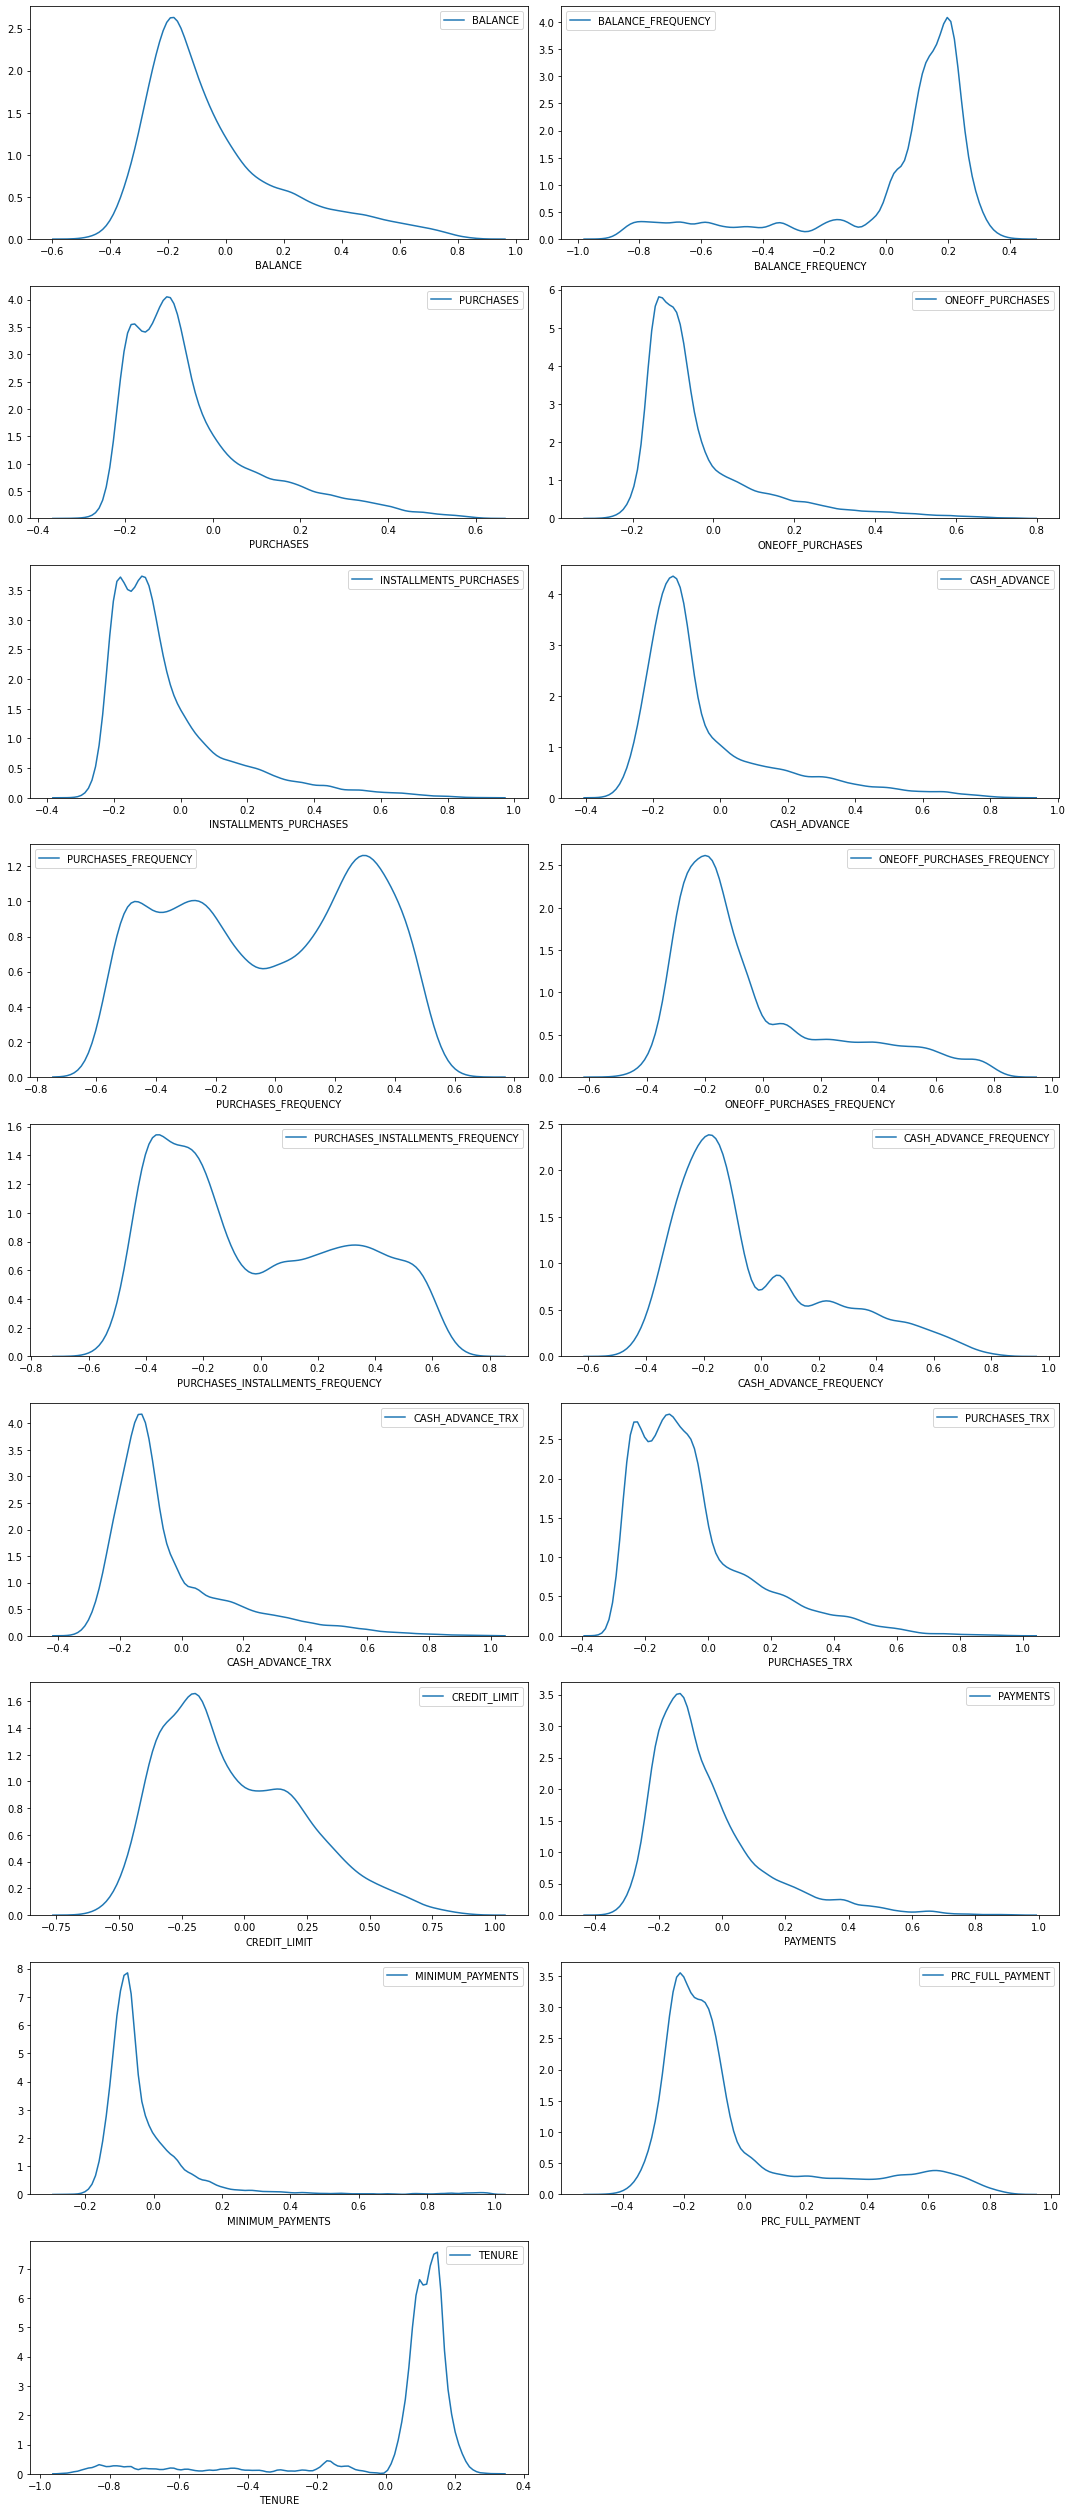

In [16]:
# Checking skweness after transformation
plt.figure(figsize=(15,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != "object":
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(x_df[col], ax=ax)
        plt.xlabel(col)
        plt.tight_layout()
        
plt.show()

In [17]:
pca = PCA(n_components=2)
x_preprocessed_reduced = pca.fit_transform(x_normalized)

In [18]:
kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 50,
        "max_iter": 500,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_preprocessed_reduced)
    sse.append(kmeans.inertia_)

In [19]:
sse

[4018.286354561528,
 2048.6049130254178,
 1287.206289129973,
 899.8486954950025,
 702.8677248063987,
 583.6560221493007,
 498.5708024667901,
 421.41000054930925,
 369.9673504113092,
 331.5389849130631,
 297.8366295335635,
 271.6865081111421,
 251.11644419973436,
 232.4314548890994,
 215.50768313201425,
 201.50848966066417,
 189.86395997760567,
 179.05978223343593,
 169.49115678344359]

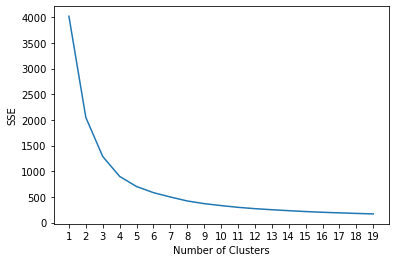

In [20]:
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
# Choosing 8 clusters
kmeans = KMeans(n_clusters=8, init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42)
kmeans.fit(x_preprocessed_reduced)

KMeans(max_iter=500, n_init=50, random_state=42)

In [22]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=["C1", "C2"])

In [23]:
pca_df = pd.DataFrame(x_preprocessed_reduced, columns=["PCA_1", "PCA_2"])
pca_df["Labels"] = kmeans.labels_
pca_df

,PCA_1,PCA_2,Labels
0,-0.481788,-0.692991,7
1,-0.537375,0.527809,2
2,0.320760,0.265226,4
3,-0.562994,-0.503868,7
4,0.320512,-0.254466,6
...,...,...,...
8631,-0.214325,-0.267827,7
8632,0.320251,-0.195203,6
8633,0.183536,-0.245043,4
8634,-0.307306,-0.176105,7


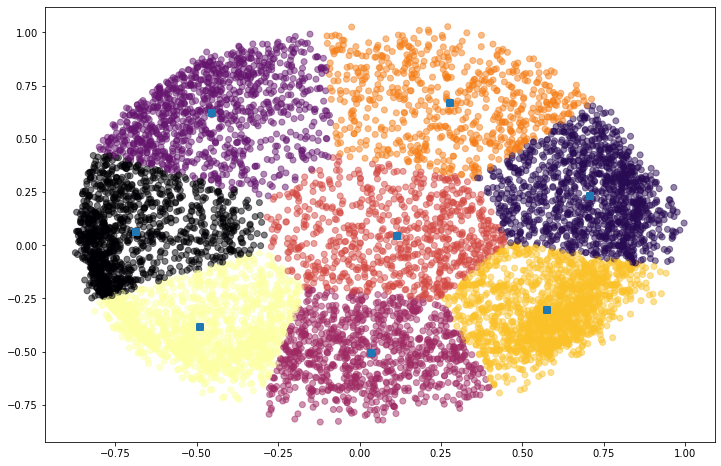

In [24]:
# Visualizing clusters
plt.figure(figsize=(12, 8))
plt.scatter(x=pca_df["PCA_1"], y=pca_df["PCA_2"], 
                c=pca_df["Labels"], cmap="inferno", alpha=0.5);
plt.scatter(x=cluster_centers["C1"], y=cluster_centers["C2"],
           marker="s", linewidths=2.0);

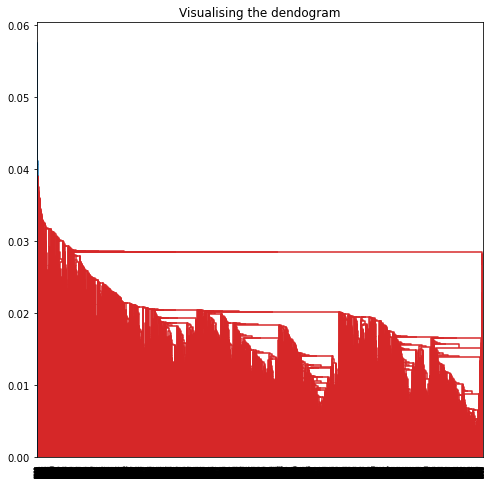

In [25]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the dendogram')
Dendrogram = dendrogram((linkage(x_preprocessed_reduced, method ="single")))

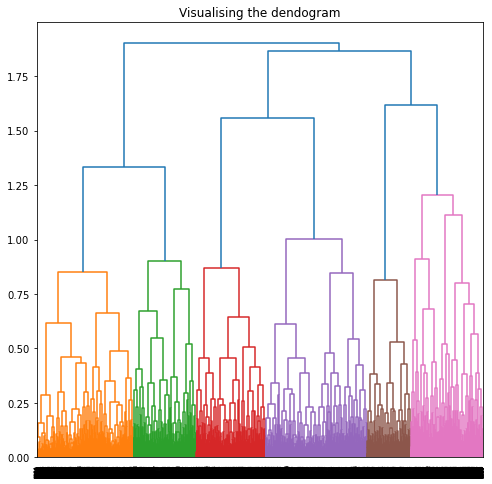

In [26]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the dendogram')
Dendrogram = dendrogram((linkage(x_preprocessed_reduced, method ="complete")))

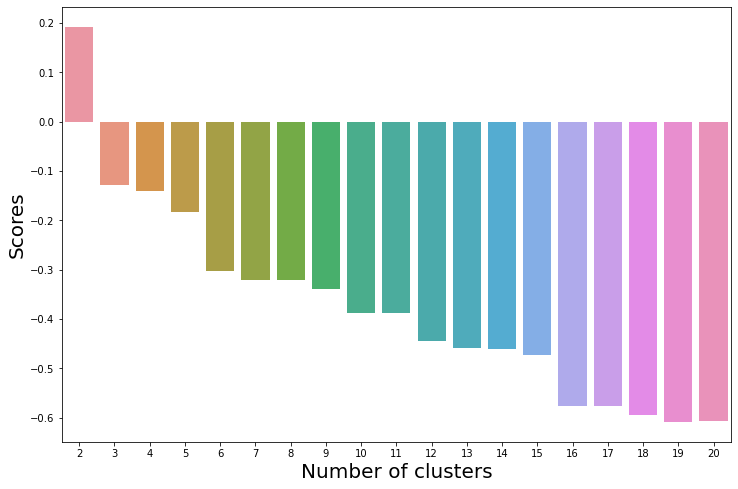

In [27]:
silhouette_scores = []
for k in range(2, 21):
    agc = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="single")
    agc.fit(x_preprocessed_reduced)
    silhouette_scores.append(silhouette_score(x_preprocessed_reduced, 
                                              agc.fit_predict(x_preprocessed_reduced)))

# Plotting a bar graph to compare the results
plt.figure(figsize=(12,8))
sns.barplot(x=np.arange(2,21), y=silhouette_scores)
plt.xlabel("Number of clusters", fontsize = 20)
plt.ylabel("Scores", fontsize = 20)
plt.show()

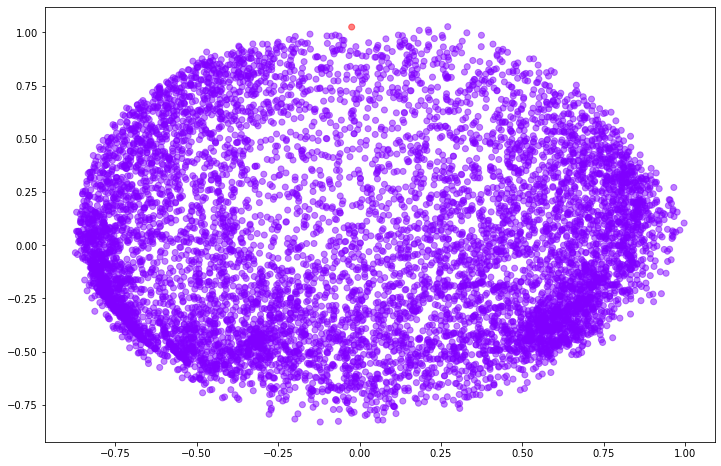

In [28]:
# Chosing 2 clusters
agc = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="single")
agc.fit(x_preprocessed_reduced)
labels = agc.labels_
pca_df = pd.DataFrame(x_preprocessed_reduced, columns=["PCA1", "PCA2"])
pca_df["Labels"] = labels
# Visualizing clusters
plt.figure(figsize=(12, 8))
plt.scatter(x=pca_df["PCA1"], y=pca_df["PCA2"], 
                c=pca_df["Labels"], cmap="rainbow", alpha=0.5);

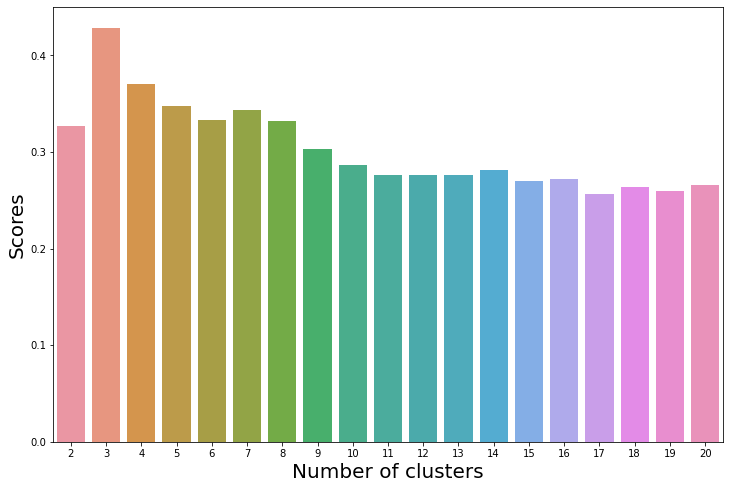

In [29]:
silhouette_scores = []
for k in range(2, 21):
    agc = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="complete")
    agc.fit(x_preprocessed_reduced)
    silhouette_scores.append(silhouette_score(x_preprocessed_reduced, 
                                              agc.fit_predict(x_preprocessed_reduced)))

# Plotting a bar graph to compare the results
plt.figure(figsize=(12,8))
sns.barplot(x=np.arange(2,21), y=silhouette_scores)
plt.xlabel("Number of clusters", fontsize = 20)
plt.ylabel("Scores", fontsize = 20)
plt.show()

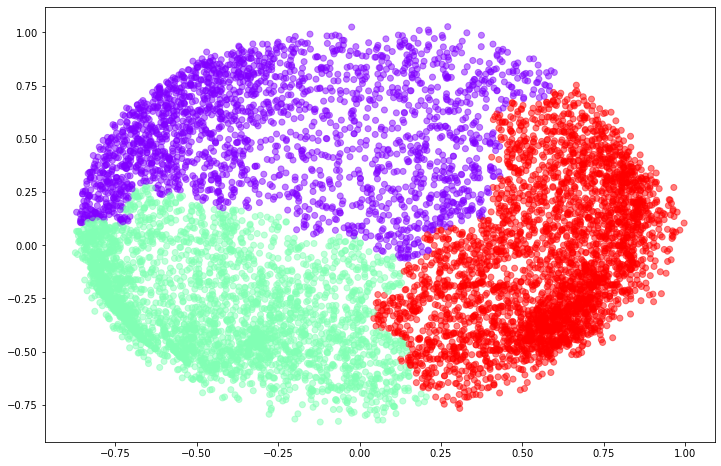

In [30]:
# Chosing 3 clusters
agc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
agc.fit(x_preprocessed_reduced)
labels = agc.labels_
pca_df = pd.DataFrame(x_preprocessed_reduced, columns=["PCA1", "PCA2"])
pca_df["Labels"] = labels
# Visualizing clusters
plt.figure(figsize=(12, 8))
plt.scatter(x=pca_df["PCA1"], y=pca_df["PCA2"], 
                c=pca_df["Labels"], cmap="rainbow", alpha=0.5);

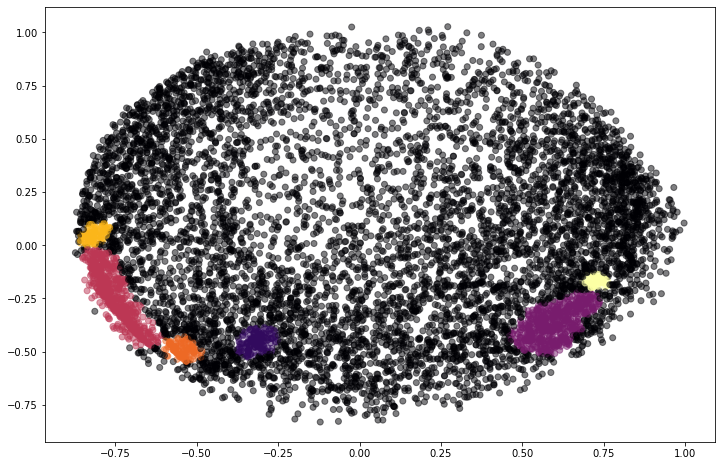

In [31]:
db = DBSCAN(eps=0.0375, min_samples=50)
db.fit(x_preprocessed_reduced)
labels = db.labels_
pca_df = pd.DataFrame(x_preprocessed_reduced, columns=["PCA1", "PCA2"])
pca_df["Labels"] = labels
# Visualizing clusters
plt.figure(figsize=(12, 8))
plt.scatter(x=pca_df["PCA1"], y=pca_df["PCA2"], 
            c=pca_df["Labels"], cmap="inferno", alpha=0.5);